In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [5]:
start='2010-01-01'
end='2019-12-31'
df=data.DataReader('TSLA','yahoo',start,end)
df.head()

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222

In [6]:
df.tail()

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2019-12-24  85.094002  82.538002  83.671997  85.050003  40273500  85.050003
2019-12-26  86.695999  85.269997  85.582001  86.188004  53169500  86.188004
2019-12-27  87.061996  85.222000  87.000000  86.075996  49728500  86.075996
2019-12-30  85.800003  81.851997  85.758003  82.940002  62932000  82.940002
2019-12-31  84.258003  80.416000  81.000000  83.666000  51428500  83.666000

In [7]:
df=df.reset_index()
df.head()

Date   High    Low   Open  Close    Volume  Adj Close
0 2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
1 2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2 2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
3 2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
4 2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222

In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

High    Low   Open  Close    Volume
0  5.000  3.508  3.800  4.778  93831500
1  6.084  4.660  5.158  4.766  85935500
2  5.184  4.054  5.000  4.392  41094000
3  4.620  3.742  4.600  3.840  25699000
4  4.000  3.166  4.000  3.222  34334500

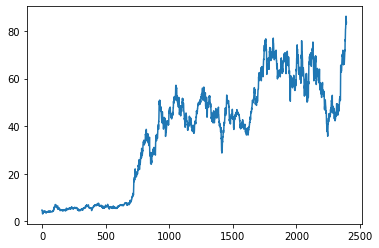

In [9]:
plt.plot(df.Close)

In [10]:
df

High        Low       Open      Close    Volume
0      5.000000   3.508000   3.800000   4.778000  93831500
1      6.084000   4.660000   5.158000   4.766000  85935500
2      5.184000   4.054000   5.000000   4.392000  41094000
3      4.620000   3.742000   4.600000   3.840000  25699000
4      4.000000   3.166000   4.000000   3.222000  34334500
...         ...        ...        ...        ...       ...
2389  85.094002  82.538002  83.671997  85.050003  40273500
2390  86.695999  85.269997  85.582001  86.188004  53169500
2391  87.061996  85.222000  87.000000  86.075996  49728500
2392  85.800003  81.851997  85.758003  82.940002  62932000
2393  84.258003  80.416000  81.000000  83.666000  51428500

[2394 rows x 5 columns]

In [11]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    56.71740
2390    57.12264
2391    57.52190
2392    57.88446
2393    58.24452
Name: Close, Length: 2394, dtype: float64

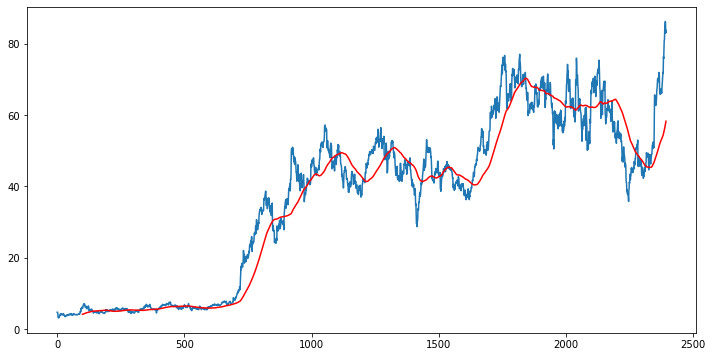

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')


In [13]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    52.43210
2390    52.57408
2391    52.71450
2392    52.85377
2393    53.00261
Name: Close, Length: 2394, dtype: float64

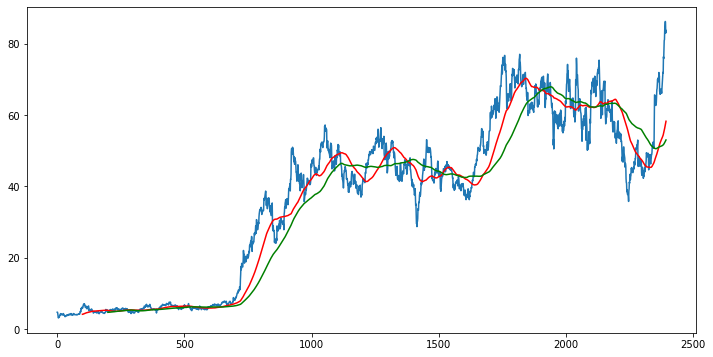

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(2394, 5)

In [17]:
#Spliting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [18]:
data_training.head()

Close
0  4.778
1  4.766
2  4.392
3  3.840
4  3.222

In [19]:
data_testing.head()

Close
1675  51.198002
1676  51.400002
1677  49.245998
1678  49.998001
1679  50.004002

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [22]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971432],
       [0.02279456],
       ...,
       [0.94889726],
       [0.96799142],
       [0.9536338 ]])

In [23]:
data_training_array.shape

(1675, 1)

In [27]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train , y_train=np.array(x_train),np.array(y_train)

In [28]:
x_train.shape

(1575, 100, 1)

In [ ]:
#ML model

In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [32]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [33]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True ))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
50/50 [==============================] - 35s 494ms/step - loss: 0.0747
Epoch 2/50
50/50 [==============================] - 11s 211ms/step - loss: 0.0170
Epoch 3/50
50/50 [==============================] - 11s 211ms/step - loss: 0.0123
Epoch 4/50
50/50 [==============================] - 11s 218ms/step - loss: 0.0128
Epoch 5/50
50/50 [==============================] - 10s 200ms/step - loss: 0.0140
Epoch 6/50
50/50 [==============================] - 10s 196ms/step - loss: 0.0113
Epoch 7/50
50/50 [==============================] - 10s 205ms/step - loss: 0.0101
Epoch 8/50
50/50 [==============================] - 10s 204ms/step - loss: 0.0103
Epoch 9/50
50/50 [==============================] - 11s 210ms/step - loss: 0.0101
Epoch 10/50
50/50 [==============================] - 11s 210ms/step - loss: 0.0095
Epoch 11/50
50/50 [==============================] - 10s 206ms/step - loss: 0.0097
Epoch 12/50
50/50 [==============================] - 10s 207ms/step - loss: 0.0090
Epoch 13/50
5

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()

Close
1675  51.198002
1676  51.400002
1677  49.245998
1678  49.998001
1679  50.004002

In [37]:
data_training.tail()

Close
1670  55.952000
1671  53.790001
1672  54.445999
1673  55.478001
1674  54.702000

In [55]:
past_100_days=data_training.tail(100)

In [56]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22768\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [42]:
final_df.head()

Close
0  47.001999
1  45.801998
2  47.000000
3  43.924000
4  43.127998

In [43]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.22240741],
       [0.19859504],
       [0.22236775],
       [0.16132874],
       [0.14553318],
       [0.16259871],
       [0.18994328],
       [0.18609361],
       [0.16613091],
       [0.17136962],
       [0.12870579],
       [0.14299323],
       [0.13934203],
       [0.14533477],
       [0.16962336],
       [0.18510144],
       [0.18272015],
       [0.16553562],
       [0.20085726],
       [0.1924039 ],
       [0.20962817],
       [0.22451089],
       [0.2703893 ],
       [0.26550779],
       [0.26284877],
       [0.2533635 ],
       [0.26122158],
       [0.25606227],
       [0.26840496],
       [0.244672  ],
       [0.24709288],
       [0.17557643],
       [0.19736481],
       [0.25237134],
       [0.25066474],
       [0.24566416],
       [0.2608247 ],
       [0.25463348],
       [0.21454934],
       [0.20819938],
       [0.23316266],
       [0.24240978],
       [0.26018967],
       [0.26102318],
       [0.27352461],
       [0.30952094],
       [0.31321187],
       [0.320

In [44]:
input_data.shape

(819, 1)

In [45]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [47]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(719, 100, 1)
(719,)


In [48]:
#Making Prediction
y_predicted=model.predict(x_test)

23/23 [==============================] - 2s 52ms/step


In [49]:
y_predicted.shape

(719, 1)

In [50]:
y_test

array([0.30567134, 0.30967975, 0.26693651, 0.28185897, 0.28197804,
       0.28380364, 0.28812952, 0.28670081, 0.2763027 , 0.26947654,
       0.26165813, 0.25685596, 0.26669844, 0.31364842, 0.30463944,
       0.32972178, 0.32753897, 0.32920583, 0.2845974 , 0.30178193,
       0.30086917, 0.33412707, 0.36214625, 0.3908402 , 0.39056239,
       0.39270546, 0.39421358, 0.4744612 , 0.49501926, 0.46049131,
       0.47517563, 0.49041549, 0.52950747, 0.51490256, 0.46779377,
       0.49620983, 0.48604987, 0.48132711, 0.50224231, 0.49029642,
       0.50255978, 0.51220379, 0.53506366, 0.52069689, 0.51458508,
       0.5361749 , 0.57094099, 0.55530417, 0.52407027, 0.4623169 ,
       0.51347377, 0.50887007, 0.56471003, 0.58042619, 0.57201257,
       0.57879899, 0.54335828, 0.54784298, 0.50458386, 0.53216649,
       0.52331625, 0.52141125, 0.49565421, 0.52089529, 0.54712862,
       0.58010871, 0.61963716, 0.64309246, 0.64055236, 0.6384887 ,
       0.668135  , 0.69008211, 0.71706946, 0.75814576, 0.70782

In [51]:
y_predicted


array([[0.8375962 ],
       [0.8291832 ],
       [0.8063787 ],
       [0.77497363],
       [0.7388122 ],
       [0.7009429 ],
       [0.6634253 ],
       [0.6276563 ],
       [0.5944779 ],
       [0.56435895],
       [0.53750646],
       [0.5139003 ],
       [0.49316943],
       [0.47457844],
       [0.4575884 ],
       [0.44195306],
       [0.42760935],
       [0.4145558 ],
       [0.40276766],
       [0.3921145 ],
       [0.38246608],
       [0.37376153],
       [0.36597326],
       [0.3591165 ],
       [0.35323676],
       [0.3483366 ],
       [0.34437305],
       [0.34128872],
       [0.33919233],
       [0.3383721 ],
       [0.338979  ],
       [0.34109783],
       [0.3448074 ],
       [0.35036573],
       [0.3579299 ],
       [0.36693376],
       [0.3767627 ],
       [0.386659  ],
       [0.39604777],
       [0.40469772],
       [0.4124338 ],
       [0.4193008 ],
       [0.42539573],
       [0.4309684 ],
       [0.43614182],
       [0.4409098 ],
       [0.44537622],
       [0.449

In [52]:
scaler.scale_

array([0.01984363])

In [53]:
scale_factor=1/0.01984363
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

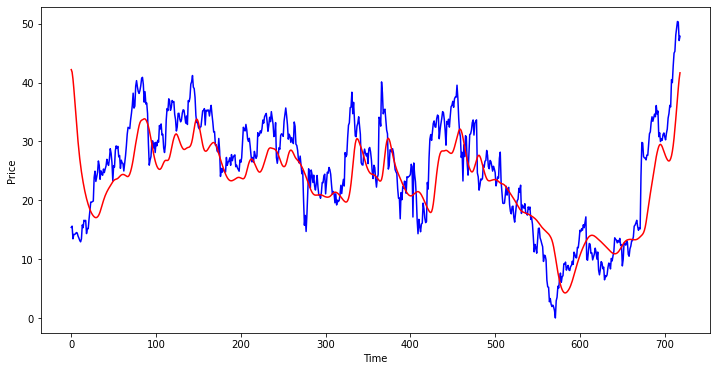

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()